In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import xarray as xr
import pySAMetrics
import matplotlib.pyplot as plt
from pySAMetrics.Simulation import Simulation
from pySAMetrics.utils import generate_simulation_paths
from tqdm import tqdm

In [2]:
!hostname -i

10.197.16.1


In [ ]:
simu_list=[]

### add control case
# Example usage
velocity = '0'
temperature='300'
bowen_ratio='1'
microphysic='1'

paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

print(paths)

simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                velocity=velocity,
                temperature=temperature,
                bowen_ratio=bowen_ratio,
                microphysic=microphysic)

simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')
simu_list.append(simu)
"""
### add shear cases
for velocity in tqdm(['2.5', '5', '10', '20']):
    temperature='300'
    bowen_ratio='1'
    microphysic='1'

    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')
    simu_list.append(simu)

### add temp cases
for temperature in tqdm(['295', '302', '305']):
    velocity='0'
    bowen_ratio='1'
    microphysic='1'

    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')
    simu_list.append(simu)

### add bowen_ration cases
for bowen_ratio in tqdm(['0.1', '0.5']):
    velocity='0'
    temperature='300'
    microphysic='1'

    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)

    print(paths)

    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],
                    velocity=velocity,
                    temperature=temperature,
                    bowen_ratio=bowen_ratio,
                    microphysic=microphysic)

    simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')
    simu_list.append(simu)

"""

{'path_3d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/3D/dataset_3d.nc', 'path_2d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/2D/RCE_T300_U0_SAM1MOM_B1_128x128x64_64.2Dcom_1.nc', 'path_1d': '/burg/glab_new/users/sga2133/SAM_simulation_storage/RCE_T300_U0_B1_M1/WORK/NETCDF_files/1D/RCE_T300_U0_SAM1MOM_B1_128x128x64.nc'}


"\n### add shear cases\nfor velocity in tqdm(['2.5', '5', '10', '20']):\n    temperature='300'\n    bowen_ratio='1'\n    microphysic='1'\n\n    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)\n\n    print(paths)\n\n    simu = Simulation(data_folder_paths=[paths['path_1d'], paths['path_2d'], paths['path_3d']],\n                    velocity=velocity,\n                    temperature=temperature,\n                    bowen_ratio=bowen_ratio,\n                    microphysic=microphysic)\n\n    simu.load(backup_folder_path='/burg/glab_new/users/sga2133/pySAMetrics_saved_simulations')\n    simu_list.append(simu)\n\n### add temp cases\nfor temperature in tqdm(['295', '302', '305']):\n    velocity='0'\n    bowen_ratio='1'\n    microphysic='1'\n\n    paths = generate_simulation_paths(velocity=velocity, temperature=temperature, bowen_ratio=bowen_ratio, microphysic=microphysic)\n\n    print(paths)\n\n    simu = Simul

In [4]:
[simu.name for simu in simu_list]

['SAM_RCE_V0_T300_B1_M1']

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import ticker

Explained variance ratio: [0.06680266 0.02313765 0.0177465 ]
Principal components shape: (3, 3200)


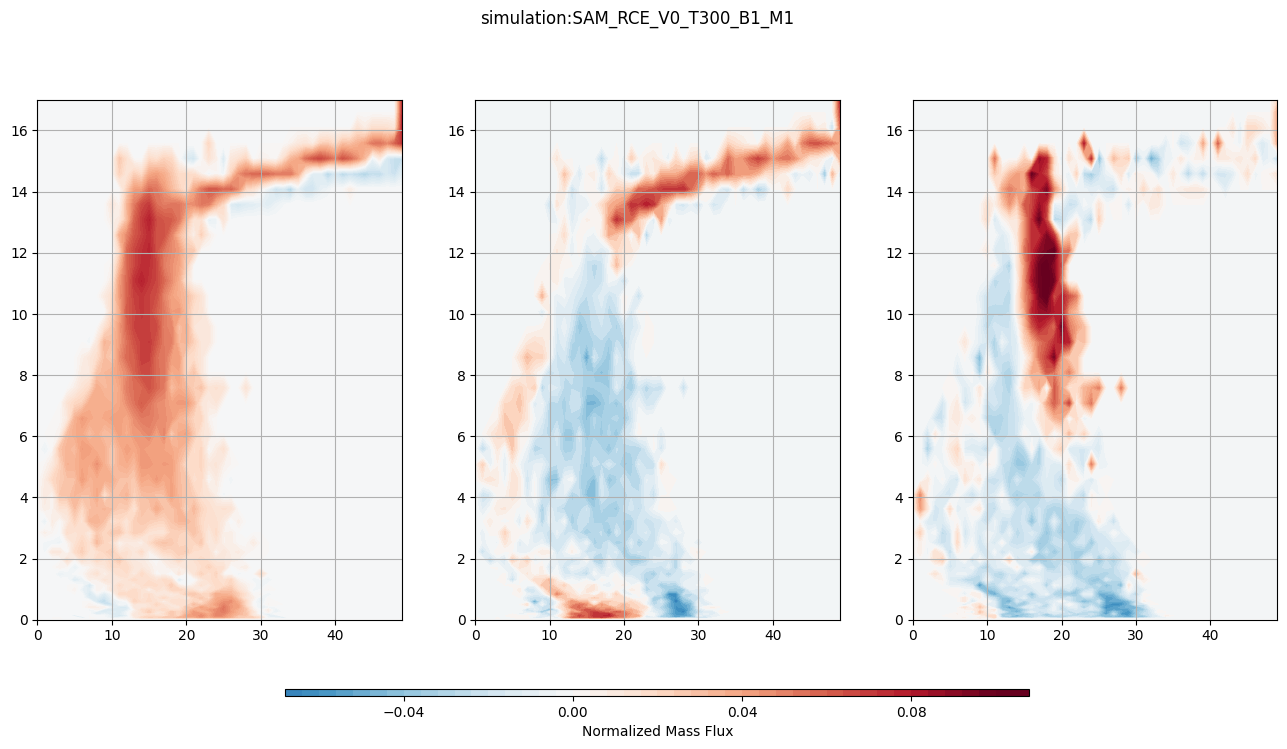

In [15]:
fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[0].dataset_3d.z.values/1000
XX,YY = np.meshgrid(fmse, z)

RHO_W = simu_list[0].dataset_isentropic.RHO_W.values

# Assuming RHO_W is your 3D variable with shape (nt, n_x, n_y)
# Step 1: Replace NaN values with -10
RHO_W_clean = np.nan_to_num(RHO_W, nan=0)

# Step 2: Reshape the data from (nt, n_x, n_y) to (nt, n_x * n_y)
nt, n_x, n_y = RHO_W_clean.shape
reshaped_RHO_W = RHO_W_clean.reshape(nt, n_x * n_y)

# Step 3: Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
standardized_RHO_W = scaler.fit_transform(reshaped_RHO_W)

# Step 4: Apply PCA
n_components = 3  # Set the number of principal components you want to keep
pca_control = PCA(n_components=n_components)
pca_result_control = pca_control.fit_transform(standardized_RHO_W)

# Access PCA results:
explained_variance_ratio = pca_control.explained_variance_ratio_
principal_components = pca_control.components_

# Outputs:
print("Explained variance ratio:", explained_variance_ratio)
print("Principal components shape:", principal_components.shape)

fig, ax = plt.subplots(1,n_components, figsize=(16,9))
# Step 5: Visualize the spatial modes (only for valid points)
for i in range(n_components):
    # Create an empty grid and fill valid points
    #spatial_mode = np.zeros((n_x, n_y))*np.nan
    spatial_mode = pca_control.components_[i].reshape(n_x, n_y)

    #print(np.min(pca.components_[i]), print(np.max(pca.components_[i])))


    im = ax[i].contourf(XX,YY, spatial_mode, 50, cmap='RdBu_r', vmin=-0.1,vmax = 0.1 )
    ax[i].grid(True)

    #ax[i].set_title(f'explained variance: {pca.explained_variance_ratio_[i]}')
    ax[i].set_ylim(0,17)

fig.suptitle(f'simulation:{simu_list[0].name}')
cb = fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.6, aspect=110, pad=0.1, label='Normalized Mass Flux')
#cb = plt.colorbar(im, shrink=0.6, orientation='horizontal')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

    #plt.show()

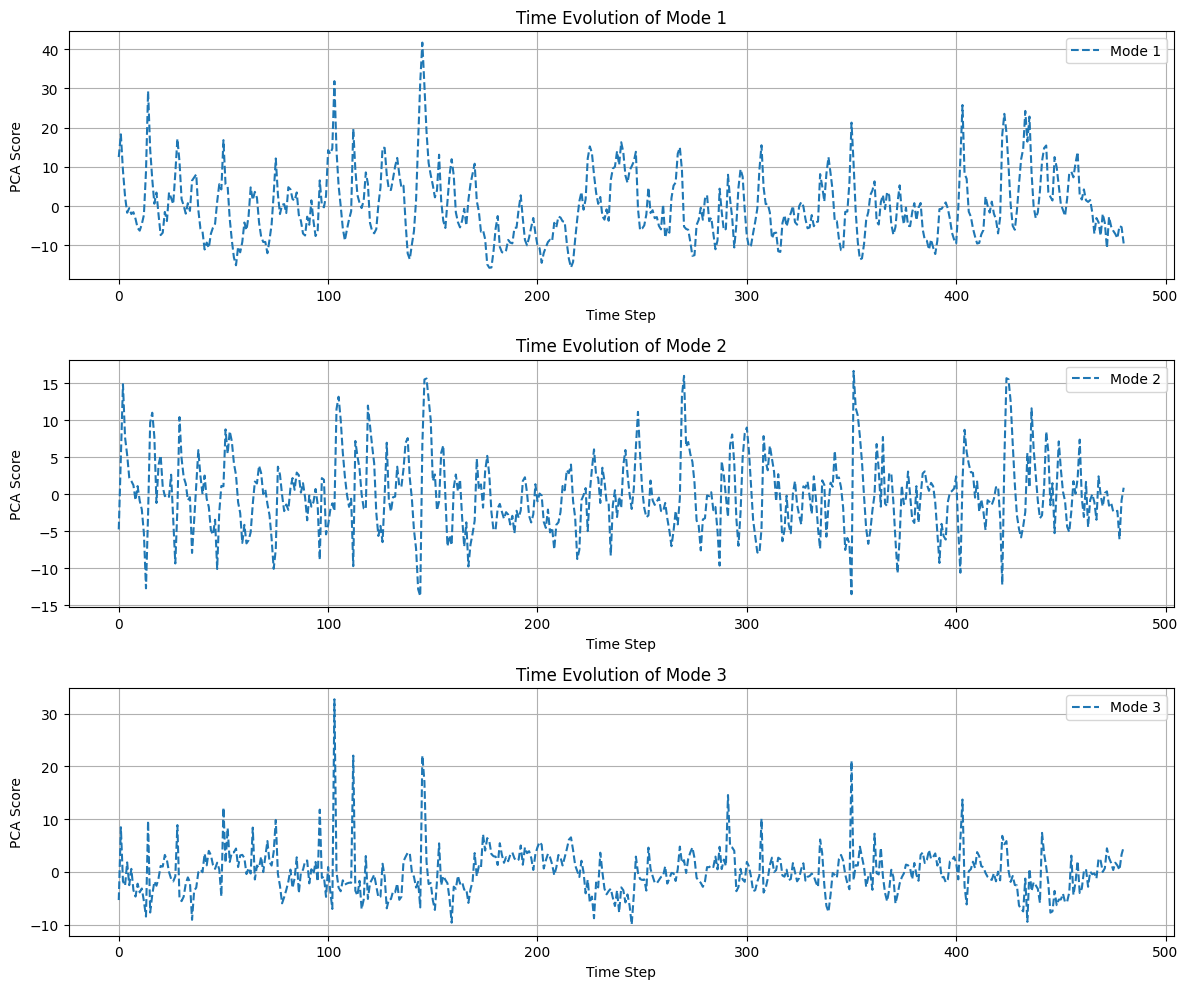

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming pca_result is the result of the PCA, which has shape (nt, n_components)
# Where nt is the number of timesteps, and n_components is the number of PCA modes

# Step 1: Get PCA scores (time evolution of modes)
# pca_result is already your PCA scores, as we computed before.

# Step 2: Plot the time evolution of each PCA mode
n_components = pca_result_control.shape[1]  # Number of PCA components

plt.figure(figsize=(12, 10))
for i in range(n_components):
    plt.subplot(n_components, 1, i + 1)  # Create a subplot for each component
    plt.plot(pca_result_control[:, i], label=f'Mode {i + 1}', color=simu_list[0].color, ls='--')  # Plot scores over time
    plt.title(f'Time Evolution of Mode {i + 1}')
    plt.xlabel('Time Step')
    plt.ylabel('PCA Score')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


 ... (more hidden) ...

Explained variance ratio: [0.06680266 0.02313765 0.01774645]
Principal components shape: (3, 3200)


 ... (more hidden) ...

Explained variance ratio: [0.05899255 0.02298389 0.01643585]
Principal components shape: (3, 3200)


 ... (more hidden) ...

Explained variance ratio: [0.05929437 0.0219873  0.01843493]
Principal components shape: (3, 3200)


 ... (more hidden) ...

Explained variance ratio: [0.0714657  0.0436117  0.02132491]
Principal components shape: (3, 3200)


 ... (more hidden) ...

Explained variance ratio: [0.12118351 0.02676741 0.02337822]
Principal components shape: (3, 3200)


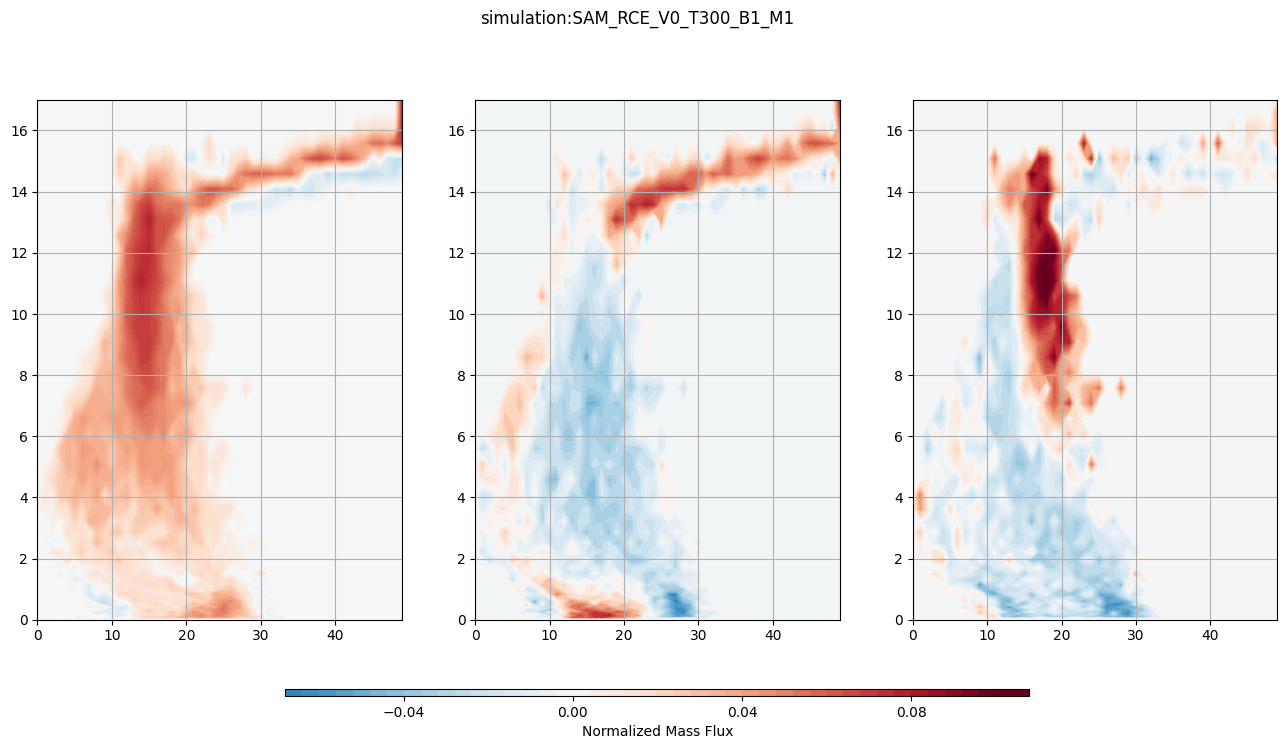

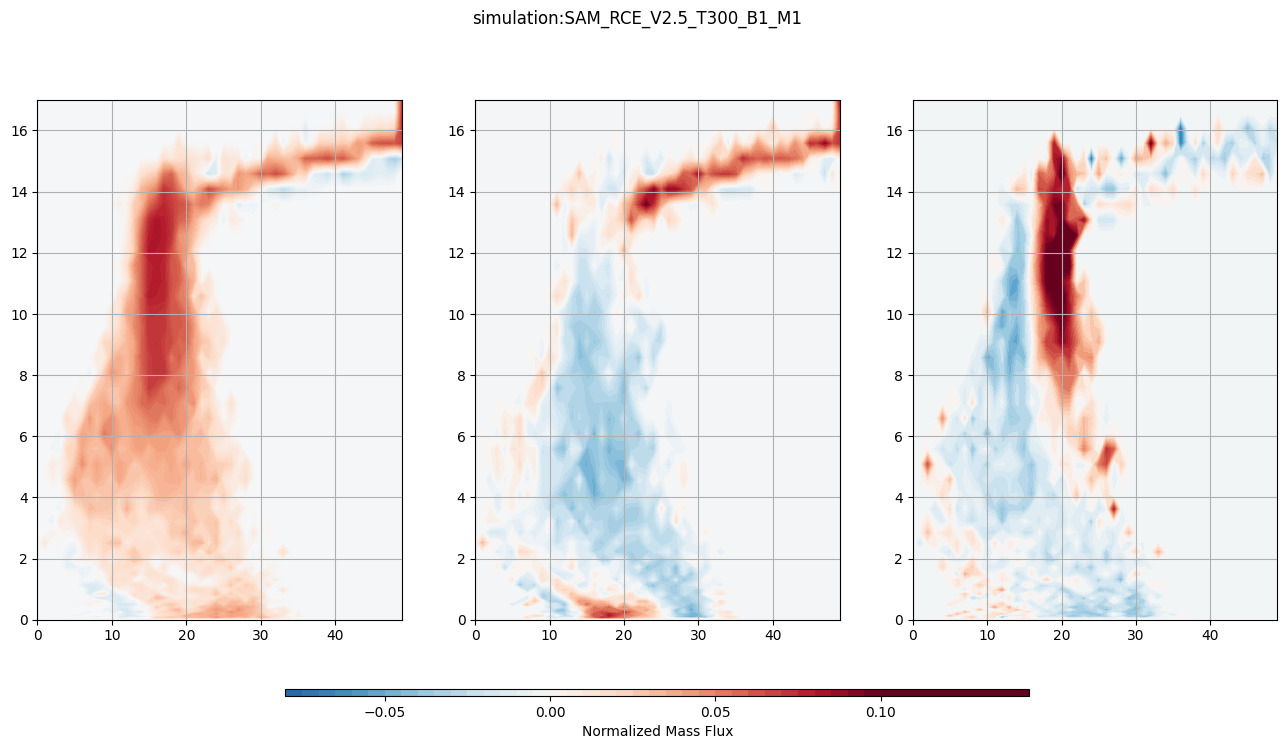

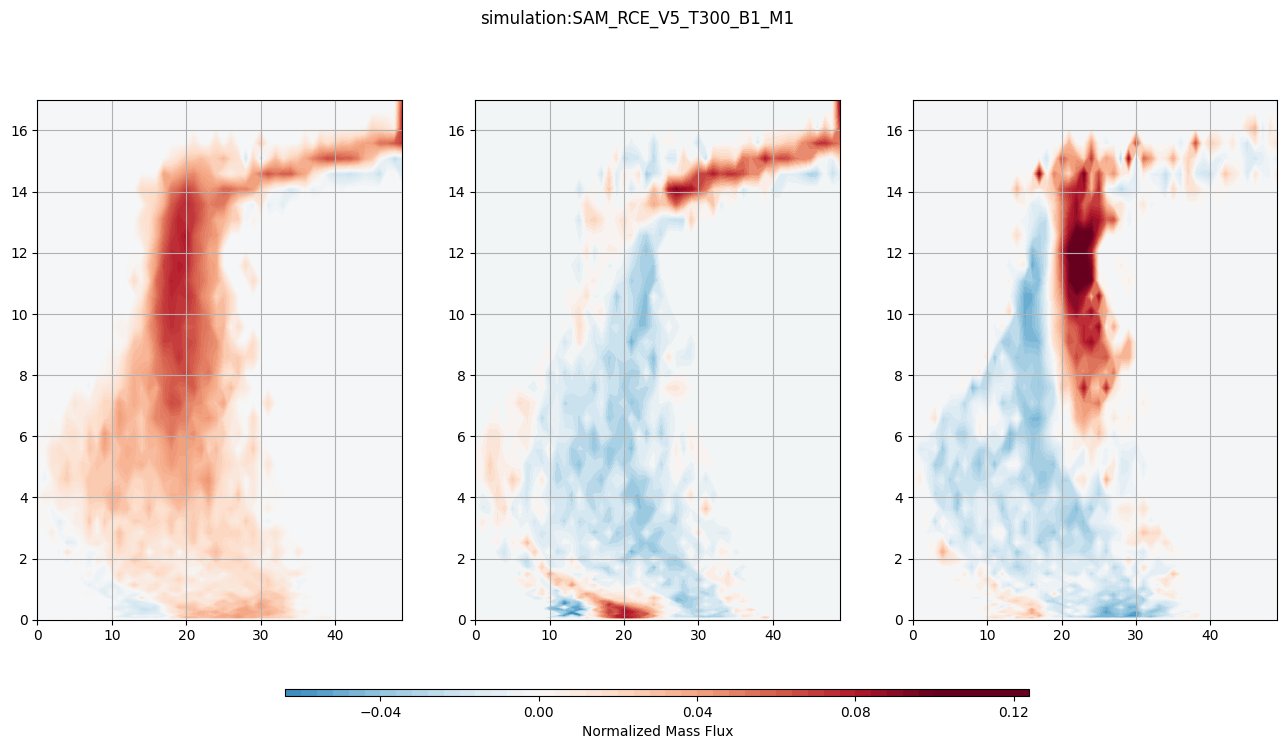

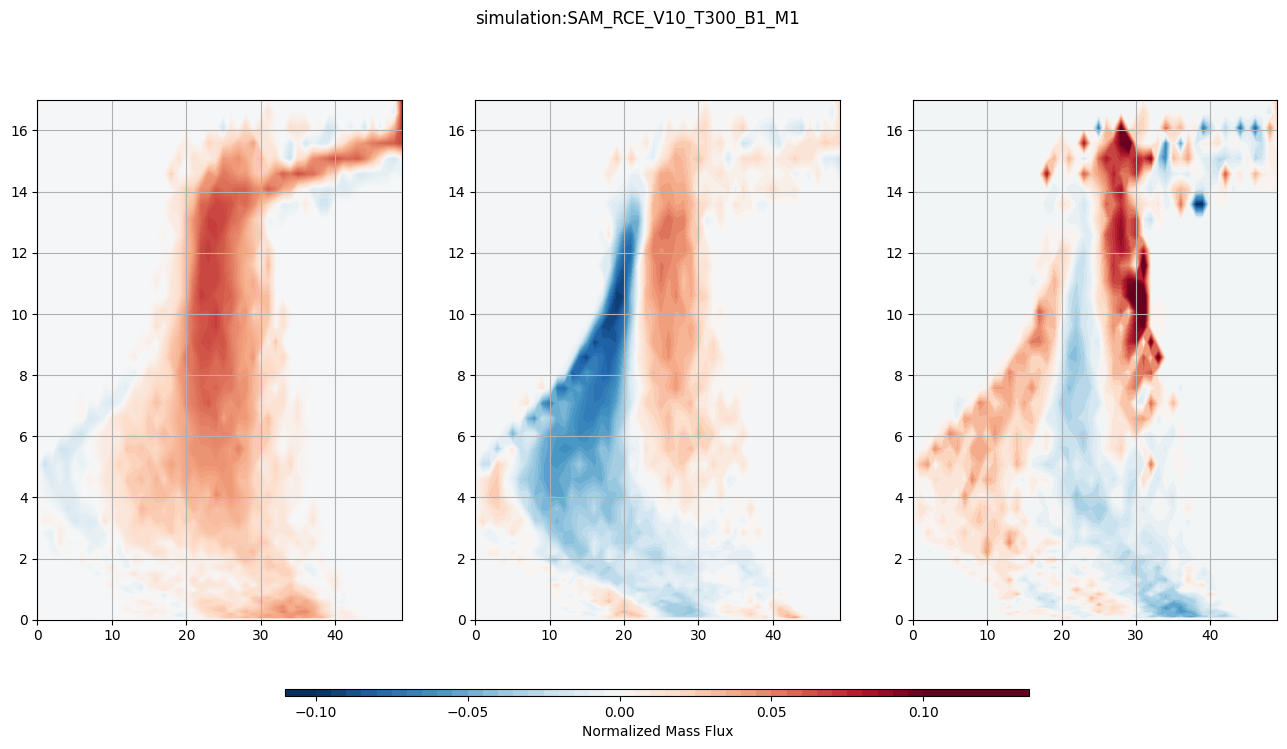

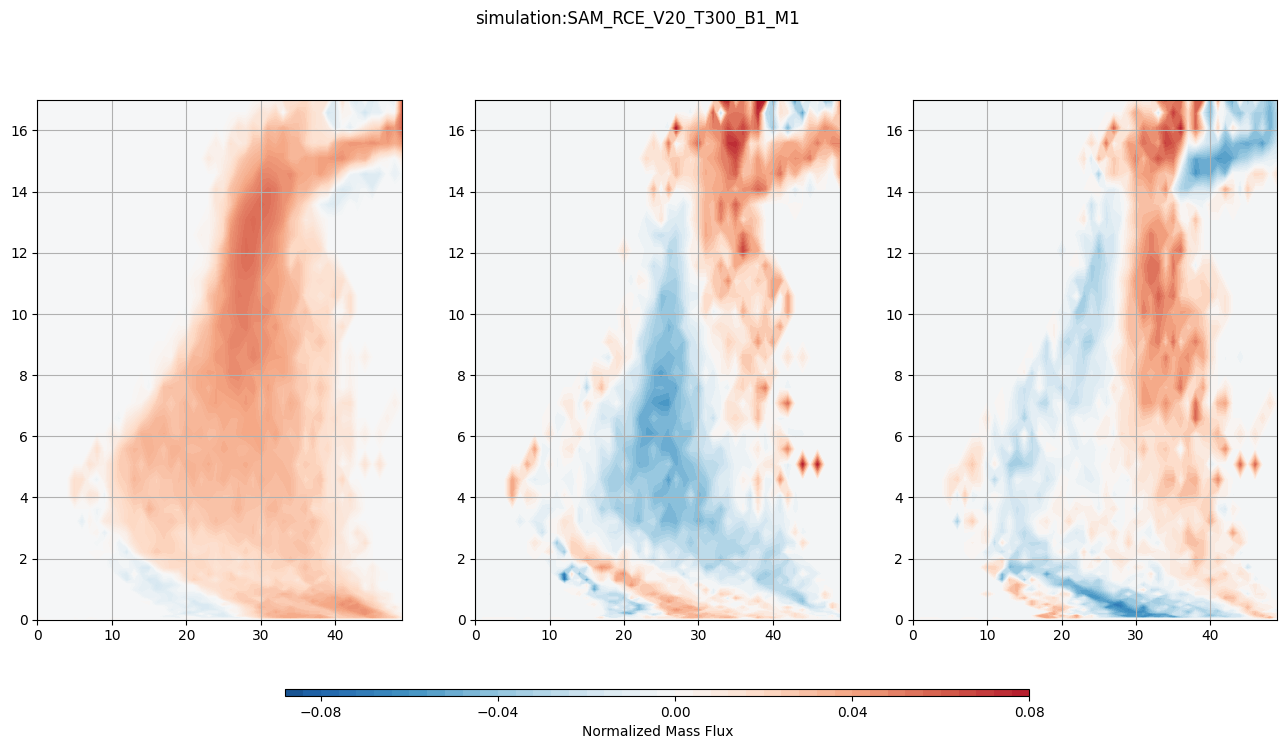

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import ticker

fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[0].dataset_3d.z.values/1000
XX,YY = np.meshgrid(fmse, z)

for i_simu in tqdm(range(5)):

    RHO_W = simu_list[i_simu].dataset_isentropic.RHO_W.values

    # Assuming RHO_W is your 3D variable with shape (nt, n_x, n_y)
    # Step 1: Replace NaN values with -10
    RHO_W_clean = np.nan_to_num(RHO_W, nan=0)

    # Step 2: Reshape the data from (nt, n_x, n_y) to (nt, n_x * n_y)
    nt, n_x, n_y = RHO_W_clean.shape
    reshaped_RHO_W = RHO_W_clean.reshape(nt, n_x * n_y)

    # Step 3: Standardize the data (mean = 0, variance = 1)
    scaler = StandardScaler()
    standardized_RHO_W = scaler.fit_transform(reshaped_RHO_W)

    # Step 4: Apply PCA
    n_components = 3  # Set the number of principal components you want to keep
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(standardized_RHO_W)

    # Access PCA results:
    explained_variance_ratio = pca.explained_variance_ratio_
    principal_components = pca.components_

    # Outputs:
    print("Explained variance ratio:", explained_variance_ratio)
    print("Principal components shape:", principal_components.shape)

    fig, ax = plt.subplots(1,n_components, figsize=(16,9))
    # Step 5: Visualize the spatial modes (only for valid points)
    for i in range(n_components):
        # Create an empty grid and fill valid points
        #spatial_mode = np.zeros((n_x, n_y))*np.nan
        spatial_mode = pca.components_[i].reshape(n_x, n_y)

        #print(np.min(pca.components_[i]), print(np.max(pca.components_[i])))


        im = ax[i].contourf(XX,YY, spatial_mode, 50, cmap='RdBu_r', vmin=-0.1,vmax = 0.1 )
        ax[i].grid(True)

        #ax[i].set_title(f'explained variance: {pca.explained_variance_ratio_[i]}')
        ax[i].set_ylim(0,17)

    fig.suptitle(f'simulation:{simu_list[i_simu].name}')
    cb = fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.6, aspect=110, pad=0.1, label='Normalized Mass Flux')
    #cb = plt.colorbar(im, shrink=0.6, orientation='horizontal')
    tick_locator = ticker.MaxNLocator(nbins=5)
    cb.locator = tick_locator
    cb.update_ticks()

        #plt.show()

 ... (more hidden) ...


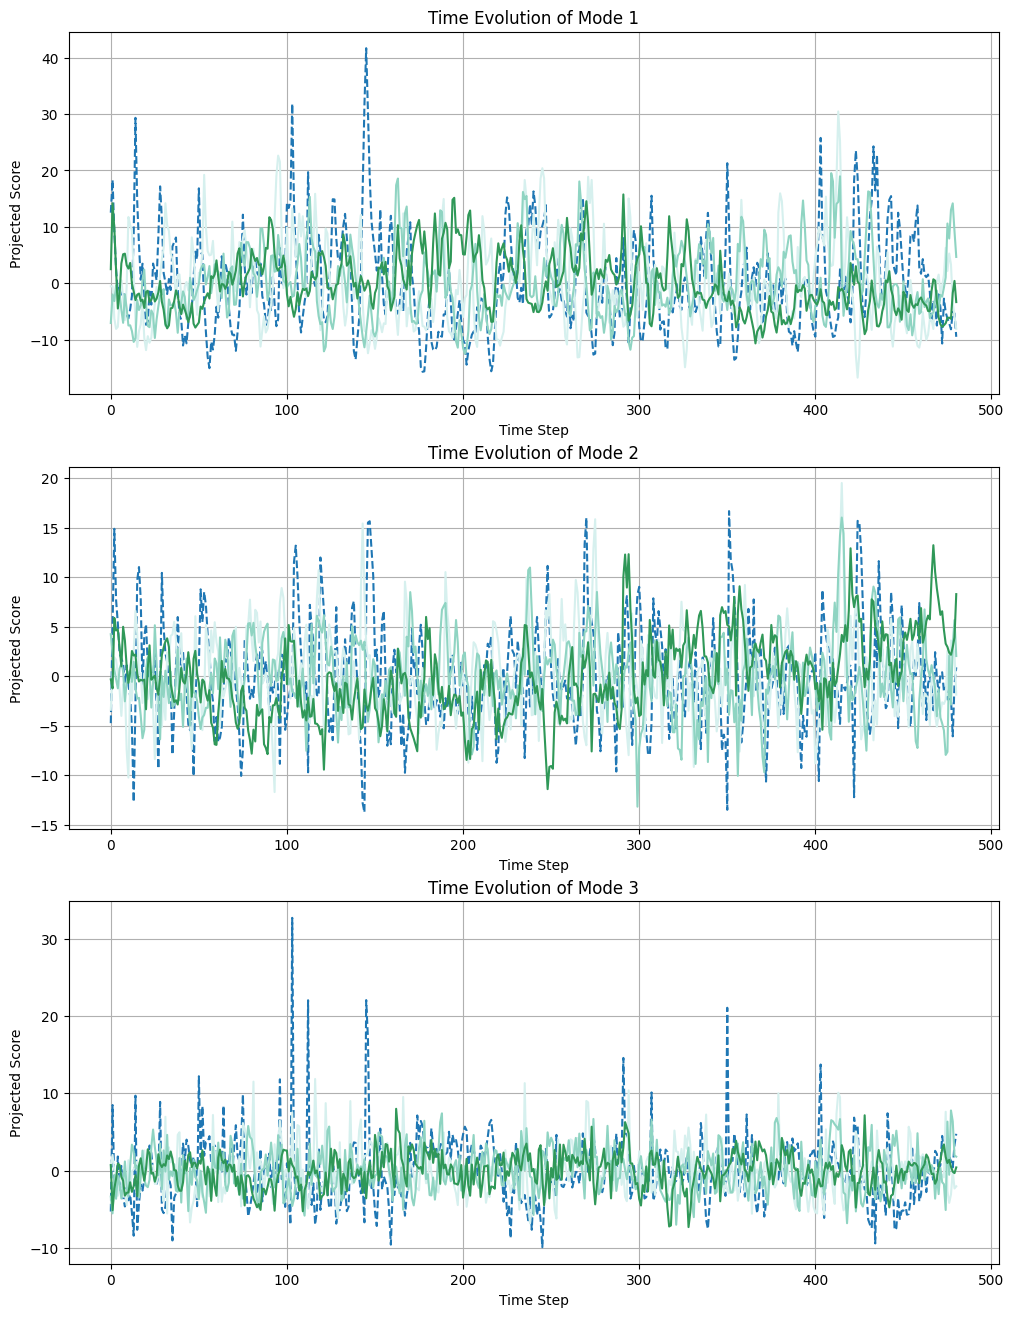

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler

fig, ax = plt.subplots(3,1, figsize=(12, 16))
for i in range(n_components):

    #ax[i].hist(pca_result[:, i], label=f'Mode {i + 1}', color=simu_list[0].color, ls='--', bins=50)  # Plot scores over time
    ax[i].plot(pca_result_control[:, i], label=f'Mode {i + 1}', color=simu_list[0].color, ls='--')  # Plot scores over time


#for i_simu in tqdm(range(1,len(simu_list))):
for i_simu in tqdm(range(1,4)):
    RHO_W_new = simu_list[i_simu].dataset_isentropic.RHO_W.values

    # Assuming RHO_W is your 3D variable with shape (nt, n_x, n_y)
    # Step 1: Replace NaN values with -10
    RHO_W_clean_new = np.nan_to_num(RHO_W_new, nan=0)

    # Step 2: Reshape the data from (nt, n_x, n_y) to (nt, n_x * n_y)
    nt, n_x, n_y = RHO_W_clean_new.shape
    reshaped_RHO_W_new = RHO_W_clean_new.reshape(nt, n_x * n_y)

    # Step 3: Standardize the data (mean = 0, variance = 1)
    scaler = StandardScaler()
    standardized_RHO_W_new = scaler.fit_transform(reshaped_RHO_W_new)




    # Step 3: Project the new data onto the PCA components from the previous analysis
    # Assuming 'pca.components_' holds the spatial modes from the original PCA
    # pca.components_.shape should be (n_components, n_x * n_y)
    projected_scores = standardized_RHO_W_new.dot(pca_control.components_.T)  # Shape: (nt_new, n_components)

    # Step 4: Plot the time evolution of the new data projected onto the old modes
    import matplotlib.pyplot as plt

    n_components = projected_scores.shape[1]  # Number of PCA components

    
    for i in range(n_components):
        ax[i].plot(projected_scores[:, i], label=f'Mode {i + 1}', color=simu_list[i_simu].color)
        #ax[i].hist(projected_scores[:, i], label=f'Mode {i + 1}', color=simu_list[i_simu].color, alpha=0.6, bins=30)
        ax[i].grid()
        #ax[i].plot(pca_result[:, i], label=f'Mode {i + 1}', color=simu_list[0].color, ls='--')  # Plot scores over time

        ax[i].set_title(f'Time Evolution of Mode {i + 1}')
        ax[i].set_xlabel('Time Step')
        ax[i].set_ylabel('Projected Score')

#ax[0].set_ylim(-10,10)
#ax[1].set_ylim(-10,10)
#ax[2].set_ylim(-10,10)
#ax[i].legend()



In [11]:
import cmocean

 ... (more hidden) ...

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


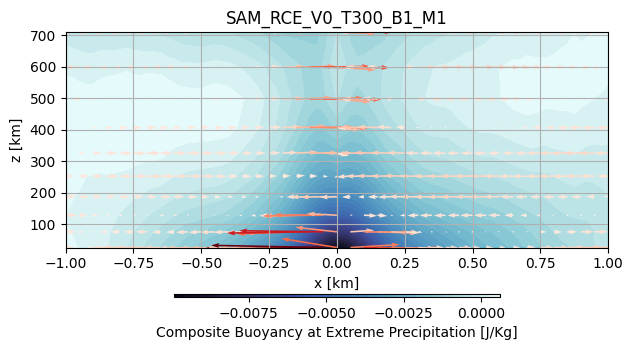

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


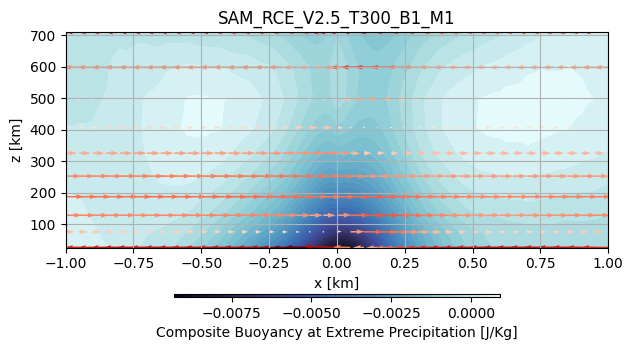

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


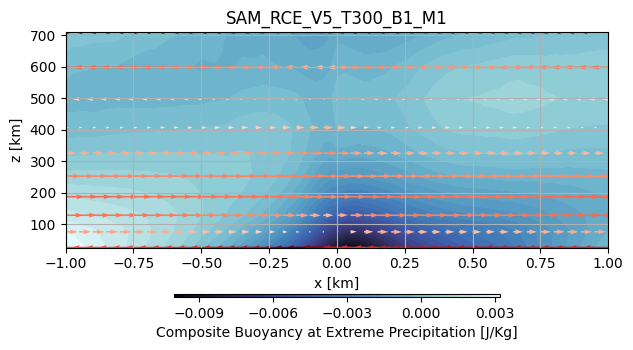

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


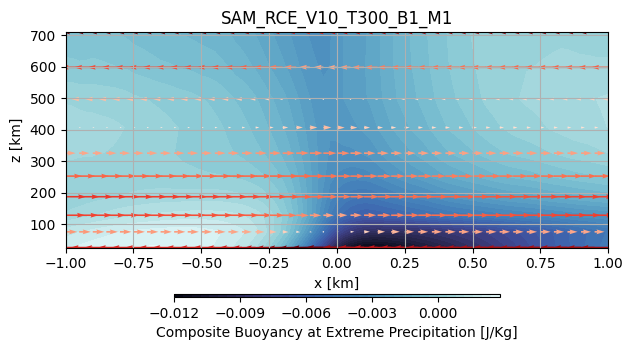

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


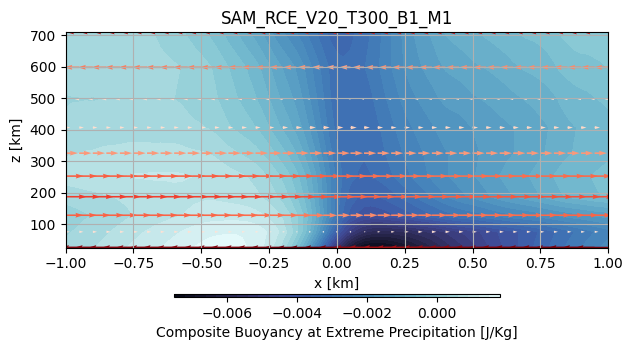

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


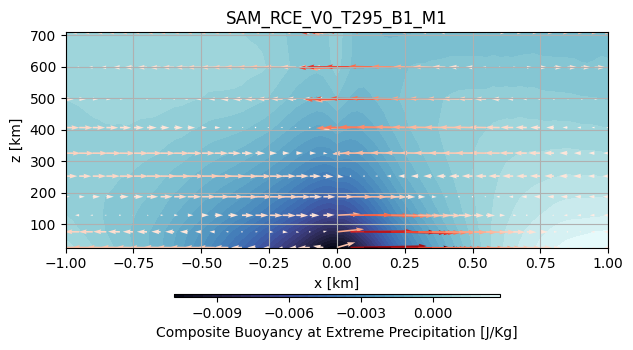

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


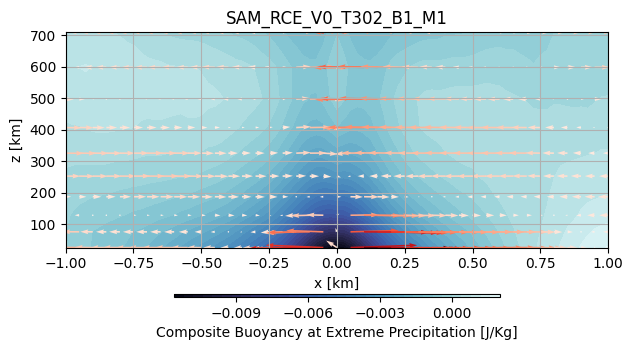

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


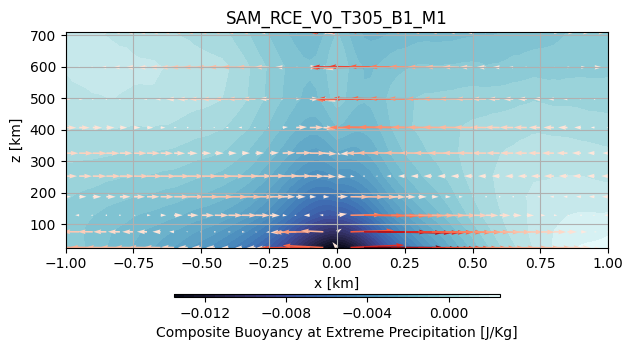

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


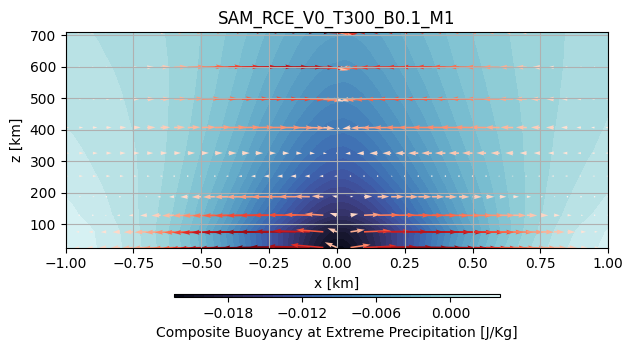

 ... (more hidden) ...
 ... (more hidden) ...
 ... (more hidden) ...


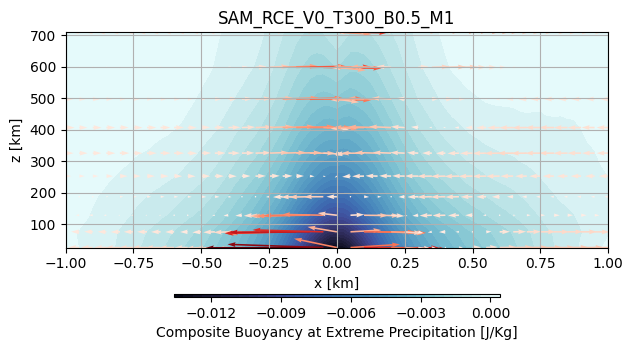

 ... (more hidden) ...


In [12]:
for simu in tqdm(simu_list):
    simu.set_composite_variables(data_name='BUOYANCY', 
                                variable_to_look_for_extreme='Prec', 
                                extreme_events_choice='max', 
                                x_margin=40,
                                y_margin=40,
                                dataset_for_variable_2d='dataset_2d',
                                dataset_for_variable_3d='dataset_computed_3d')
                                
    simu.set_composite_variables(data_name='U', 
                                variable_to_look_for_extreme='Prec', 
                                extreme_events_choice='max', 
                                x_margin=40,
                                y_margin=40,
                                dataset_for_variable_2d='dataset_2d',
                                dataset_for_variable_3d='dataset_3d')

    simu.set_composite_variables(data_name='W', 
                                variable_to_look_for_extreme='Prec', 
                                extreme_events_choice='max', 
                                x_margin=40,
                                y_margin=40,
                                dataset_for_variable_2d='dataset_2d',
                                dataset_for_variable_3d='dataset_3d')
    plt.figure(figsize=(7,4))

    XX, ZZ = np.meshgrid(np.linspace(-1,1,81),simu.dataset_3d.z.values)
    im = plt.contourf(XX[:10,:], ZZ[:10,:], np.mean(simu.BUOYANCY_composite_Prec[:10,:,:], axis=1), 35, cmap=cmocean.cm.ice)

    UU = np.mean(simu.U_composite_Prec[:10,:,:], axis=1)[:,::2] - np.mean(np.mean(simu.U_composite_Prec[:10,:,:], axis=1)[:,::2], axis=0)
    WW = np.mean(simu.W_composite_Prec[:10,:,:], axis=1)[:,::2] - np.mean(np.mean(simu.W_composite_Prec[:10,:,:], axis=1)[:,::2], axis=0)

    norm = np.sqrt(UU**2 +WW**2)
    im2 = plt.quiver(XX[:10,:][:,::2], ZZ[:10,:][:,::2], UU, WW, [norm], cmap='Reds')
    
    cb = plt.colorbar(im, orientation='horizontal', aspect=110, shrink=0.6, label='Composite Buoyancy at Extreme Precipitation [J/Kg]')
    tick_locator = ticker.MaxNLocator(nbins=5)
    cb.locator = tick_locator
    cb.update_ticks()
    plt.xlabel('x [km]')
    plt.ylabel('z [km]')
    plt.grid(True)
    plt.title(f'{simu.name}')
    plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

fmse, z = simu_list[0].dataset_isentropic.fmse.values, simu_list[0].dataset_3d.z.values / 1000
XX, YY = np.meshgrid(fmse, z)

RHO_W = simu_list[0].dataset_isentropic.RHO_W.values

# Assuming RHO_W is your 3D variable with shape (nt, n_x, n_y)
# Step 1: Replace NaN values with 0 (or other values)
RHO_W_clean = np.nan_to_num(RHO_W, nan=0)

# Step 2: Reshape the data from (nt, n_x, n_y) to (nt, n_x * n_y)
nt, n_x, n_y = RHO_W_clean.shape
reshaped_RHO_W = RHO_W_clean.reshape(nt, n_x * n_y)

# Step 3: Standardize the data (mean = 0, variance = 1)
scaler = StandardScaler()
standardized_RHO_W = scaler.fit_transform(reshaped_RHO_W)

# Step 4: Apply t-SNE
n_components = 2  # t-SNE typically works best with 2 or 3 components
tsne = TSNE(n_components=n_components, random_state=42)
tsne_result = tsne.fit_transform(standardized_RHO_W)

"""
# Step 5: Visualize the t-SNE results
fig, ax = plt.subplots(1, n_components, figsize=(16, 9))
for i in range(n_components):
    # Create an empty grid and fill valid points
    spatial_mode = tsne_result[:, i].reshape(n_x, n_y)

    im = ax[i].contourf(XX, YY, spatial_mode, 50, cmap='RdBu_r', vmin=-0.1, vmax=0.1)
    ax[i].grid(True)
    ax[i].set_ylim(0, 17)

fig.suptitle(f'simulation: {simu_list[0].name}')
cb = fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.6, aspect=110, pad=0.1, label='t-SNE Output')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

# plt.show()
"""

"\n# Step 5: Visualize the t-SNE results\nfig, ax = plt.subplots(1, n_components, figsize=(16, 9))\nfor i in range(n_components):\n    # Create an empty grid and fill valid points\n    spatial_mode = tsne_result[:, i].reshape(n_x, n_y)\n\n    im = ax[i].contourf(XX, YY, spatial_mode, 50, cmap='RdBu_r', vmin=-0.1, vmax=0.1)\n    ax[i].grid(True)\n    ax[i].set_ylim(0, 17)\n\nfig.suptitle(f'simulation: {simu_list[0].name}')\ncb = fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.6, aspect=110, pad=0.1, label='t-SNE Output')\ntick_locator = ticker.MaxNLocator(nbins=5)\ncb.locator = tick_locator\ncb.update_ticks()\n\n# plt.show()\n"

In [8]:
tsne_result

array([[ 2.6630495e+00, -3.7851050e+00],
       [ 1.5325086e+00, -4.5336089e+00],
       [ 4.0406346e+00, -1.9297416e+00],
       [ 3.5539460e+00, -1.6929833e+00],
       [-1.7264202e+00, -1.8376302e+00],
       [-1.8178688e-01, -1.5415553e+00],
       [-2.4877172e+00, -2.0255418e+00],
       [ 8.2172549e-01, -7.9296094e-01],
       [ 1.3032526e+00, -5.6665260e-01],
       [ 1.0779750e+00, -6.7175430e-01],
       [ 1.3768657e+00,  3.4960840e+00],
       [ 8.9483285e-01, -1.1966720e+00],
       [ 1.2636344e+00, -8.5403681e-01],
       [ 1.4641416e-01, -2.5097420e+00],
       [ 2.7124424e+00, -5.2864604e+00],
       [ 3.9491606e+00, -2.6472414e+00],
       [ 3.2690728e+00, -1.3329682e+00],
       [-1.2940594e+00, -2.4274340e+00],
       [-7.5164312e-01, -3.8982277e+00],
       [ 7.3927075e-01, -8.9841098e-01],
       [-1.3785831e+00,  4.8823565e-01],
       [ 8.8714540e-01,  4.1687055e+00],
       [ 4.1251431e+00,  1.5059859e+00],
       [-2.0366728e+00, -2.0535851e-01],
       [-7.43515

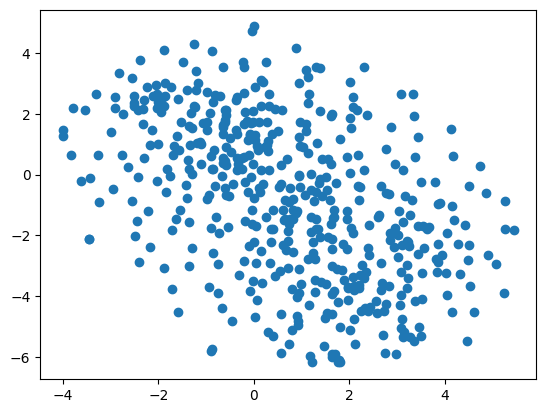

In [9]:
plt.scatter(tsne_result[:,0], tsne_result[:,1])